In [8]:
import numpy as np 
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm 
import random 

from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

In [9]:
env = gym.make('Taxi-v3',render_mode = 'rgb_array').env

## Q Learning Taxi

In [10]:
class Agent:
    def __init__(self, env, alpha, gamma):
        self.env   = env 
        self.alpha = alpha
        self.gamma = gamma
        
        self.Q = np.zeros([env.observation_space.n, env.action_space.n])
        
    def action(self, state):
        return np.argmax(self.Q[state]) 
    
    def QUpdate(self, state, action, next_state, reward):
        
        # Q learning equation update
        self.Q[state, action] = self.Q[state, action] + \
                                self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state,action])
    
    def train(self, epoches = 20000, epsilon = 0.1):
        
        timesteps_per_episode = []
        penalties_per_episode = []
        
        for i in tqdm(range(epoches)):
            
            state = env.reset()[0]
            epochs, penalties, reward = 0, 0, 0
            done = False
            
            while not done: 
                if random.uniform(0,1) <= epsilon:
                    action = env.action_space.sample()
                else: 
                    action = self.action(state) 
                
                # print(env.step(action))
                next_state, reward, done, info, more_info = env.step(action)
                
                done = done or info 
                
                self.QUpdate(state, action, next_state, reward) 
                
                if reward == -10:
                    penalties += 1

                state = next_state
                epochs += 1
        
            timesteps_per_episode.append(epochs)
            penalties_per_episode.append(penalties)  
        
        

        fig, ax = plt.subplots(figsize = (12, 4))
        ax.set_title("Time Taken for each ride")
        ax.set_ylabel('Time taken')
        ax.set_xlabel('Episode')     
        pd.Series(timesteps_per_episode).plot(kind='line')
        plt.show()

        fig, ax = plt.subplots(figsize = (12, 4))
        ax.set_title("Penalties for each ride")  
        ax.set_ylabel('Penalty')
        ax.set_xlabel('Episode')    
        pd.Series(penalties_per_episode).plot(kind='line')
        plt.show()
    
    def drive(self, start_state):
        
        env.reset()
        state = start_state 
        
        env.s = state
        done = False

        reward = 0
        penalties = 0 
        
        # store frames to latter plot them
        frames = []
        steps = 0
        
        while not done:
            action = self.action(state)
    
            next_state, reward, done, info , more_info = env.step(action)
            
            done = done or info 
            
            if reward == -10:
                penalties += 1
            
            frames.append(env.render())
            state = next_state 
            steps += 1
            
        
        print("Finished driving")
        print("Time taken: ",steps)
        print("Penalties incurred: ", penalties) 
        
        return frames 
            
        

In [11]:
alpha = 0.1
gamma = 0.99

agent = Agent(gamma = gamma, alpha = alpha, env = env)

  0%|          | 4/20000 [00:00<08:23, 39.75it/s]

100%|██████████| 20000/20000 [00:08<00:00, 2379.90it/s]


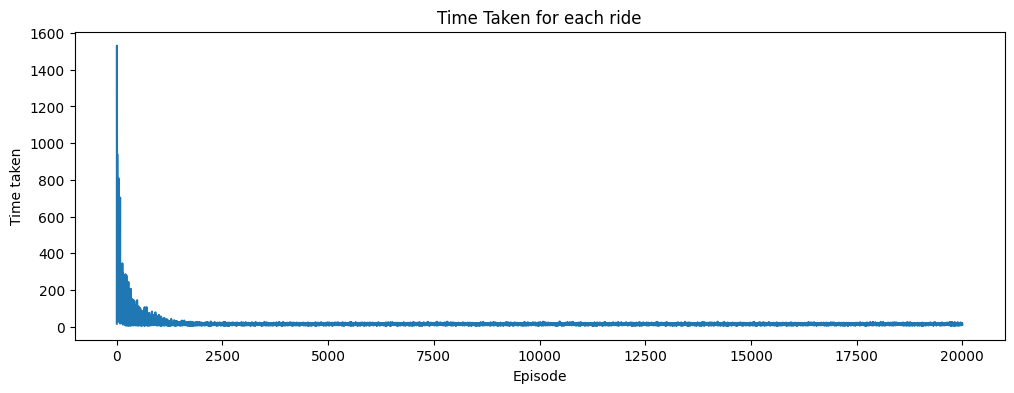

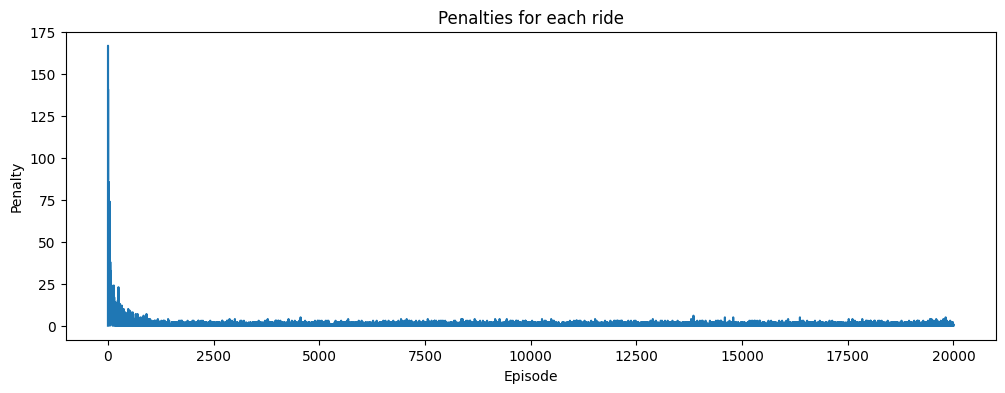

In [12]:
agent.train()

In [18]:
frames = agent.drive(start_state = 342)

Finished driving
Time taken:  16
Penalties incurred:  0


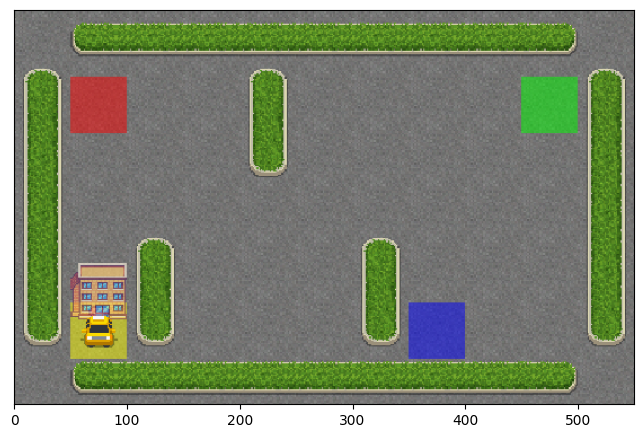

In [19]:
# from IPython.display import clear_output
# from time import sleep

# def print_frames(frames):
#     for i, frame in enumerate(frames):
#         clear_output(wait=True)
#         print(frame)
#         sleep(1)
        
# print_frames(frames)
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(frames)):
    ax.cla()
    ax.axes.yaxis.set_visible(False)
    ax.imshow(frames[i])
    display(fig)
    clear_output(wait=True)
    sleep(1) 
